In [1]:
import matplotlib
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy
import scipy.interpolate
import mne
import scipy
import statistics
from pywt import wavedec
from scipy import signal
import matplotlib.colors as mcolors
import random
import seaborn as sns
import os
from scipy import stats
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from numpy import asarray
from numpy import savetxt
import pickle

In [2]:
from Definicions import upperchanel
from Definicions import group_inf
#from Definicions import mediumchanel
from Definicions import opteciogrups
from Definicions import find_nearest
from Definicions import grabt
from Definicions import epoch_return
from Definicions import calcul
from Import_all import Import_Patients #to create a list of the patiens with the EO-EC data and 12 chanels
from BandPower_Epoch_1c import BanPoer_Epoch
from Definicions import calcul



In [3]:

with open("EO_EC_Pacients_save.txt", "rb") as fp:   # Unpickling
    EO_EC_Pacients_up = pickle.load(fp)


with open("sorted_list_ECsave.txt", "rb") as fp:   # Unpickling
    sorted_list_EC_up = pickle.load(fp)


with open("sorted_list_EO_save.txt", "rb") as fp:   # Unpickling
    sorted_list_EO_up = pickle.load(fp)

In [4]:
#Import the data to analise
import csv

# open the file in universal line ending mode 
with open('Files/TEIQue-SF.csv', 'rU') as infile:
  # read the file as a dictionary for each row ({header : value})
  reader = csv.DictReader(infile)
  data = {}
  for row in reader:
    for header, value in row.items():
      try:
        data[header].append(value)
      except KeyError:
        data[header] = [value]

# extract the variables you want
names = data['ID']
TeiQueSF_emotionality = data['TeiQueSF_emotionality']
TeiQueSF_well_being = data['TeiQueSF_well_being']

Chanel 1

In [5]:
chanels1_betta_EO, chanels1_gama_EO, chanels1_alpha_EO, chanels1_theta_EO, chanels1_delta_EO = BanPoer_Epoch(EO_EC_Pacients_up, 0,0)

In [6]:
chanels1_betta_EC, chanels1_gama_EC, chanels1_alpha_EC, chanels1_theta_EC, chanels1_delta_EC = BanPoer_Epoch(EO_EC_Pacients_up, 1,0)

(0.005033476941685166, 0.9633136151596099)


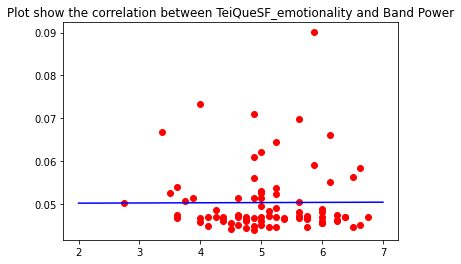

(0.010871241144123883, 0.9208656051114708)


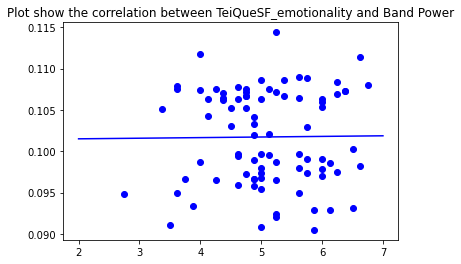

(0.016120105703646727, 0.8828843864773578)


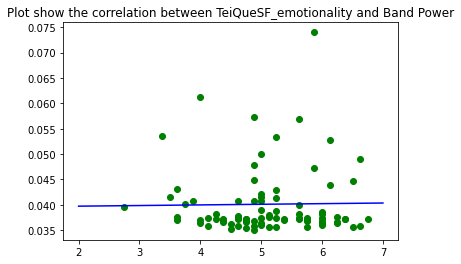

(-0.08980553764344697, 0.4109067782442177)


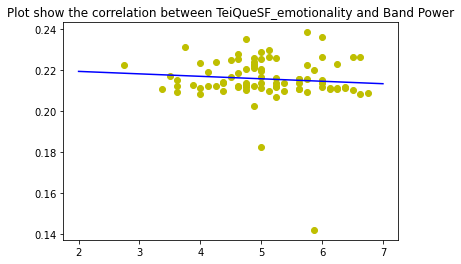

(-0.026495724442911647, 0.8086575530837139)


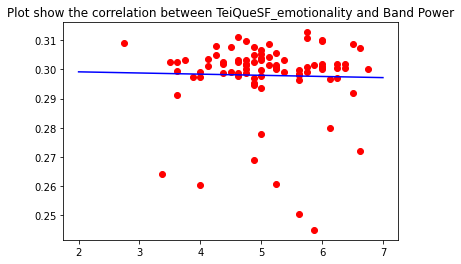

(0.005033476941685166, 0.9633136151596099)
(0.010871241144123883, 0.9208656051114708)
(0.016120105703646727, 0.8828843864773578)
(-0.08980553764344697, 0.4109067782442177)
(-0.026495724442911647, 0.8086575530837139)


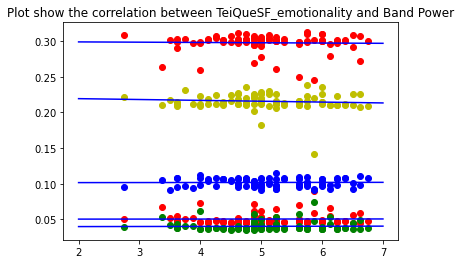

In [16]:
list_bands =[chanels1_betta_EO, chanels1_gama_EO, chanels1_alpha_EO, chanels1_theta_EO, chanels1_delta_EO]
colors = ['r','b','g','y','r']
pi_x_patient=[]
for e in range(0,5):

    eo_betta_pi = calcul(names, sorted_list_EO_up, TeiQueSF_emotionality, list_bands[e], 2, 7, colors[e])
    plt.show()
    pi_x_patient.append(eo_betta_pi)

for e in range(0,5):

    eo_betta_pi = calcul(names, sorted_list_EO_up, TeiQueSF_emotionality, list_bands[e], 2, 7, colors[e])
    pi_x_patient.append(eo_betta_pi)



Chanel 2

In [13]:
chanels_betta_EO_C2, chanels_gama_EO_C2, chanels_alpha_EO_C2, chanels_theta_EO_C2, chanels_delta_EO_C2 = BanPoer_Epoch(EO_EC_Pacients_up, 0,1)

In [10]:
chanels_betta_EC_C2, chanels1_gama_EC_C2, chanels1_alpha_EC_C2, chanels1_theta_EC_C2, chanels1_delta_EC_C2 = BanPoer_Epoch(EO_EC_Pacients_up, 1,1)

(0.07676198449689511, 0.4823785226459708)
(-0.0885810732752079, 0.41734121911797745)
(0.078489368491436, 0.47254850387264946)
(-0.03497313188971366, 0.7492113753744896)
(-0.005510126423740332, 0.9598423234617312)


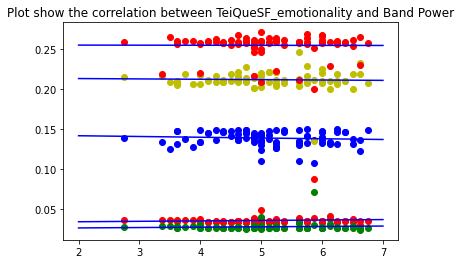

In [15]:
lis_bands =[chanels_betta_EO_C2, chanels_gama_EO_C2, chanels_alpha_EO_C2, chanels_theta_EO_C2, chanels_delta_EO_C2]
pi_x_patient=[]
for e in range(0,5):
    eo_betta_pi = calcul(names, sorted_list_EO_up, TeiQueSF_emotionality, lis_bands[e], 2, 7, colors[e])
    pi_x_patient.append(eo_betta_pi)